Name: Tan Guan Wei Gabriel
<br>
Homework 1

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

In [16]:
data = pd.read_excel("Industry_Portfolios.xlsx")

/Users/gab/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [17]:
data.head()

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86


**Q: Estimate the vector of mean returns and the covariance matrix of returns for the ten industry portfolios.**

In [18]:
#Covariance Matrix
covMatrixTemp = data.loc[:,'NoDur':].cov()
#Changing to array
covMatrix = covMatrixTemp.to_numpy()
covMatrixTemp

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960
Other,14.438409,39.361987,26.313423,18.320469,23.855470,19.610836,19.226524,14.864553,9.992960,31.163771


In [19]:
#Vector of mean expectation deviation
dataMeanTemp = data.loc[:,'NoDur':].mean()
#changing to Array
dataMean = dataMeanTemp.to_numpy().reshape(10,1)
dataMeanTemp

NoDur    0.902833
Durbl    0.733333
Manuf    1.012833
Enrgy    1.231167
HiTec    0.766250
Telcm    0.881417
Shops    0.916333
Hlth     0.783833
Utils    0.907167
Other    0.489083
dtype: float64

**Q: Create a table showing the mean returns and standard deviation of returns for the ten industry portfolios**

In [20]:
#Table for mean and std
data.loc[:,'NoDur':].describe().loc[['mean','std']].T

,mean,std
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


**Q: Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios, with expected return on the vertical axis and standard deviation of return on the horizontal axis. This plot should cover the range from 0% to 2%, in increments of 0.1% (or less), on the vertical axis.**

In [21]:
covMatrixInverse = np.linalg.pinv(covMatrix)
e = np.ones((10,1), dtype=int)
ePrime =  np.ones((1,10), dtype=int)
datameanTrans  = dataMean.reshape(1,10)

In [22]:
import decimal
alpha = np.matmul(np.matmul(datameanTrans,covMatrixInverse),e).item()
zeta = np.matmul(np.matmul(datameanTrans,covMatrixInverse),dataMean).item()
delta = np.matmul(np.matmul(ePrime,covMatrixInverse),e).item()

In [23]:
import math
#Using a smaller step of 0.0025 to get a nicer graph
l = [i for i in np.arange(0, 2, 0.0025)]
expectedReturnList = []
stdList = []
stdList2 = []
expectedReturnList2 = []
globMinVarReturn = alpha / delta
for x in l:
    x = round(x,5)
    tempVar = 1/delta + delta / (zeta * delta - (alpha)**2) * (x - globMinVarReturn)**2
    tempStd = math.sqrt(tempVar)
    if (x - globMinVarReturn > 0 ):
        stdList.append(tempStd)
        expectedReturnList.append(x)
    else:
        stdList2.append(tempStd)
        expectedReturnList2.append(x)
    

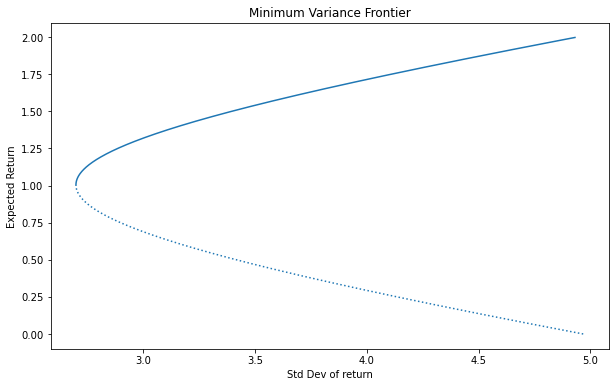

In [24]:
plt.figure(figsize = (10, 6))
plt.plot(stdList,expectedReturnList)
plt.plot(stdList2,expectedReturnList2, linestyle = ':', color = '#1f77b4')
plt.xlabel("Std Dev of return")
plt.ylabel("Expected Return")
plt.title("Minimum Variance Frontier")
plt.show()

**Q: Briefly explain the economic significance and relevance of the minimum-variance frontier to an investor.**

<u>Answer<br></u>
The minimum variance frontier show an investor the different portfolios which possess the lowest amount of  risk for any given expected return. This allows investor to gauge if they are taking greater risk than necessary to achieve their desired expected return. For an logical risk averse investor, they will only invest in portfolios on the minimum-variance frontier(specifically the top-half of the curve) as if they invest in the right portion of the curve, there would be a less risky portfolio available with the same expected return. In addition, they are unable to invest on the left portion of the curve as it is no such portfolios exists in that spectrum 

**Q: Plot the efficient frontier (with the riskless asset) on the same plot as the minimum-variance frontier generated by the ten industry portfolios.**

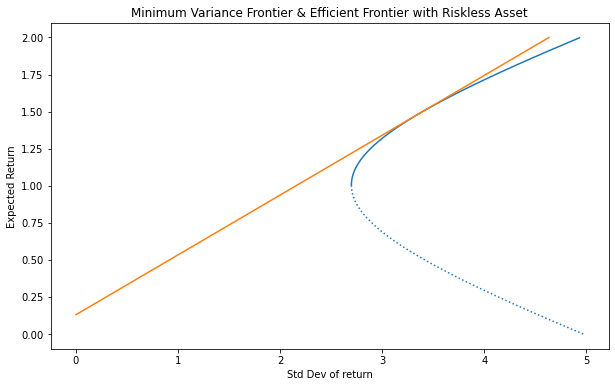

In [25]:
tempRisklessAssetVar =  (2 - 0.13)**2 / (zeta - 2*alpha*0.13 + delta * 0.13**2)
tempRisklessAssetStd =   math.sqrt(tempRisklessAssetVar)
risklessAssetStd = [0,tempRisklessAssetStd]
risklessAssetRet = [0.13, 2]

plt.figure(figsize = (10, 6))

plt.plot(stdList,expectedReturnList )
plt.plot(stdList2,expectedReturnList2, linestyle = ':', color = '#1f77b4')
plt.plot(risklessAssetStd,risklessAssetRet)

plt.xlabel("Std Dev of return")
plt.ylabel("Expected Return")
plt.title("Minimum Variance Frontier & Efficient Frontier with Riskless Asset")

plt.show()

**Q: Briefly explain the economic significance and relevance of the efficient frontier to an investor.**

<u>Answer<br></u>
The efficient frontier shows the investor the portfolio which has the highest mean return for a given level of risk. Using the investor's indifference curve and the efficient frontier will allow the investor to identify the portfolio which maximise his/her expected utility by maxismising trade off between expected return and risk

**Q:Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.**

In [26]:
#Calculation of Sharpe Ratio
sharpeRatio = (zeta - 2 * alpha * 0.13 + delta *(0.13)**2)**0.5
sharpeRatio

0.40356559934950875

In [27]:
#Calculation of tangency portfolio weights
tanPortReturn = (alpha *0.13 - zeta)/ (delta * 0.13 - alpha)

#knowing w* = a + b * Rp
atemp1 =  zeta * np.matmul(covMatrixInverse,e) - alpha * np.matmul(covMatrixInverse,dataMean)
atemp2 = zeta * delta - alpha*alpha
a = atemp1/atemp2

btemp1 = delta * np.matmul(covMatrixInverse,dataMean) - alpha * np.matmul(covMatrixInverse,e)
b = btemp1 / atemp2

portfolioWeights = a + b * tanPortReturn
portfolioWeights
sectorList = list(data.loc[:,'NoDur':].describe().loc[['mean','std']].T.index)
tempDf = pd.DataFrame(portfolioWeights,sectorList,['Weights'])
tempDf

,Weights
NoDur,0.567972
Durbl,-0.214073
Manuf,0.714105
Enrgy,0.104087
HiTec,-0.363438
Telcm,-0.095463
Shops,0.991647
Hlth,0.075570
Utils,0.132643
Other,-0.913051


**Q: Briefly explain the economic significance and relevance of the tangency portfolio to an investor.**

<u>Answer<br></u>
Tangency portfolio is also the optimal risky portfolio for any investor given the risk free rate. Any portfolios before or after this point, will have an less than optimised tradeoff between risk and expected return. Thus, the tangency portfolio can regarded as the portfolio that has the best return to risk ratio (highest sharpe ratio) for the investor 
